<a href="https://colab.research.google.com/github/junya17/S-P500_predic_linear_regression/blob/main/S%26P500_easy_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pandas numpy matplotlibの

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




In [ ]:
#　dataの読み込み

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_sets/all_stocks_5yr.csv')
# 日付の型を確認し、datetime型に変換
data['date'] = pd.to_datetime(data['date'])
# 日付で並び替え
data = data.drop_duplicates(subset='date')
# インデックスを日付に設定
data.set_index('date', inplace=True)

In [ ]:
data.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
# データの基本統計の確認
print(data.describe())

                open           high            low          close  \
count  619040.000000  619040.000000  619040.000000  619040.000000   
mean       83.023801      83.778872      82.256677      83.043763   
std        97.379606      98.208547      96.508498      97.389748   
min         1.620000       1.690000       1.500000       1.590000   
25%        40.220000      40.620000      39.830000      40.245000   
50%        62.590000      63.150000      62.020000      62.620000   
75%        94.370000      95.180000      93.540000      94.410000   
max      2044.000000    2067.990000    2035.110000    2049.000000   

             volume  
count  6.190400e+05  
mean   4.321823e+06  
std    8.693610e+06  
min    0.000000e+00  
25%    1.070320e+06  
50%    2.082094e+06  
75%    4.284509e+06  
max    6.182376e+08  


In [ ]:
data.shape

(130934, 7)

In [ ]:
# 欠損値を調べる

data.isnull().sum()


open           0
high           0
low            0
close          0
volume         0
Name           0
MA_20         19
MA_50         49
prev_close     1
dtype: int64

In [ ]:
# 前日の終値で欠損値を補完。

data['close'] = data['close'].fillna(method='ffill')
data['open'] = data['open'].fillna(data['close'].shift(1))
data['high'] = data['high'].fillna(data['close'].shift(1))
data['low'] = data['low'].fillna(data['close'].shift(1))
data['volume'] = data['volume'].fillna(0)  # 出来高は取引がなかった場合0と考えることができます


In [ ]:
# 欠損値を調べる

data.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

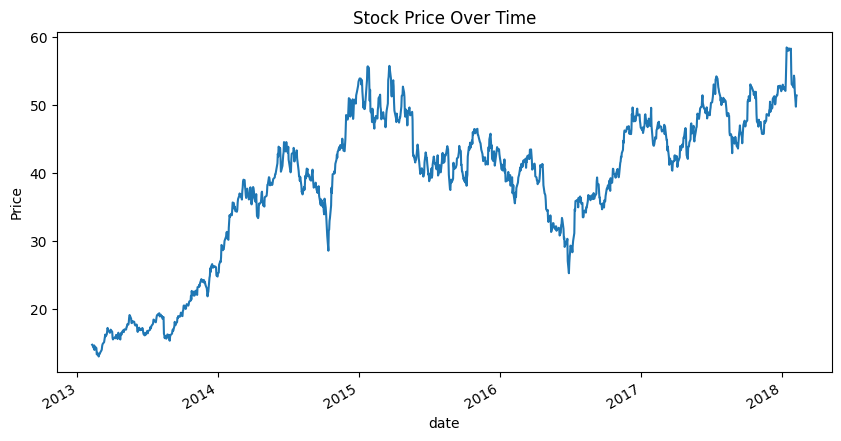

In [ ]:
# 時系列データのプロット
data['close'].plot(figsize=(10, 5))
plt.title('Stock Price Over Time')
plt.ylabel('Price')
plt.show()

In [ ]:
# 移動平均の計算
data['MA_20'] = data['close'].rolling(window=20).mean()  # 20日移動平均
data['MA_50'] = data['close'].rolling(window=50).mean()  # 50日移動平均

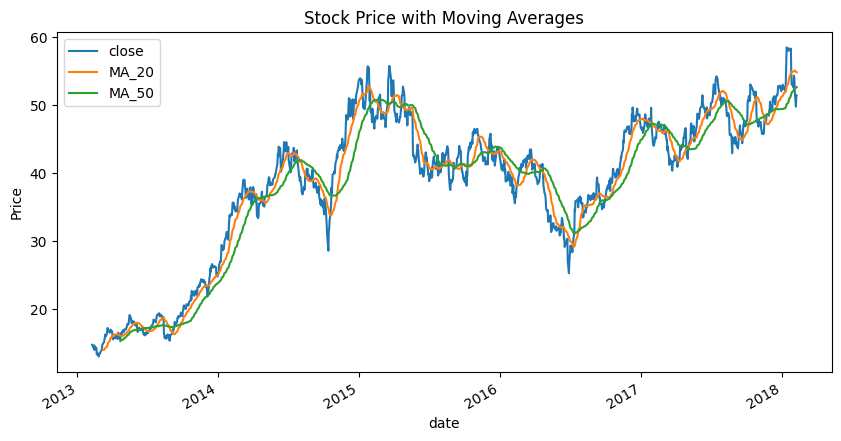

In [ ]:
# 移動平均のプロット
data[['close', 'MA_20', 'MA_50']].plot(figsize=(10, 5))
plt.title('Stock Price with Moving Averages')
plt.ylabel('Price')
plt.show()

In [ ]:
# 相関係数の計算
correlation = data.corr()
print(correlation)

            open      high       low     close    volume     MA_20     MA_50
open    1.000000  0.999939  0.999928  0.999872 -0.142705  0.992277  0.980805
high    0.999939  1.000000  0.999903  0.999936 -0.142316  0.992287  0.980852
low     0.999928  0.999903  1.000000  0.999939 -0.143240  0.992167  0.980664
close   0.999872  0.999936  0.999939  1.000000 -0.142802  0.992174  0.980715
volume -0.142705 -0.142316 -0.143240 -0.142802  1.000000 -0.141129 -0.139124
MA_20   0.992277  0.992287  0.992167  0.992174 -0.141129  1.000000  0.992766
MA_50   0.980805  0.980852  0.980664  0.980715 -0.139124  0.992766  1.000000


<ipython-input-22-f152c0a273e9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<ipython-input-25-7d6ae390b359>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


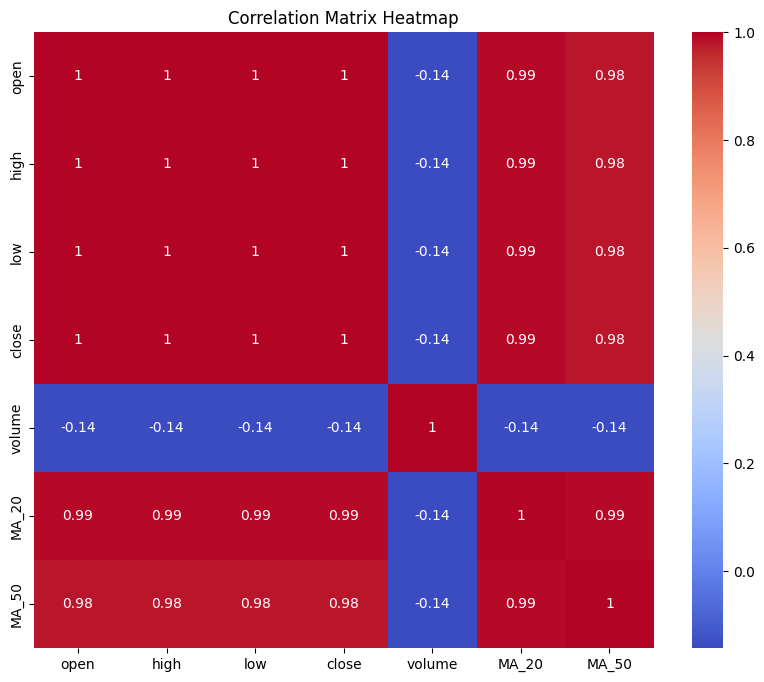

In [ ]:
# 相関行列の計算
corr_matrix = data.corr()

# 相関行列のヒートマップの作成
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
data = data.drop_duplicates(subset='date')

KeyError: ignored

In [ ]:
# インデックスを日付に設定
date.set_index('date', inplace=True)

NameError: ignored

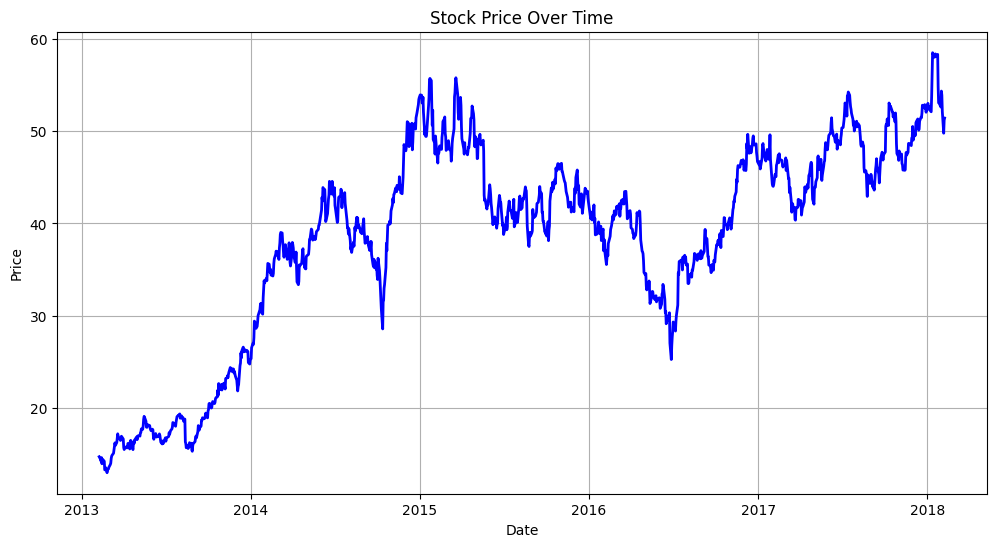

In [ ]:
# 折れ線グラフのプロット
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['close'], marker='', color='blue', linewidth=2, linestyle='-')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [ ]:
# 終値の列を1日シフトさせて新しい列を作成（前日の終値）
data['prev_close'] = data['close'].shift(1)

In [ ]:
# prompt: nanを調べる

data.isnull().sum()


open           0
high           0
low            0
close          0
volume         0
Name           0
MA_20         19
MA_50         49
prev_close     1
dtype: int64

In [ ]:
# NaN値を持つ行を削除
data = data.dropna()

In [ ]:
# 特徴量（前日の終値）とラベル（今日の終値）を設定
X = data[['prev_close']]
y = data['close']

In [ ]:
# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# 線形回帰モデルの作成とトレーニング
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# テストデータで予測
predictions = model.predict(X_test)

In [ ]:
# モデルの性能評価
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.7861864843719677


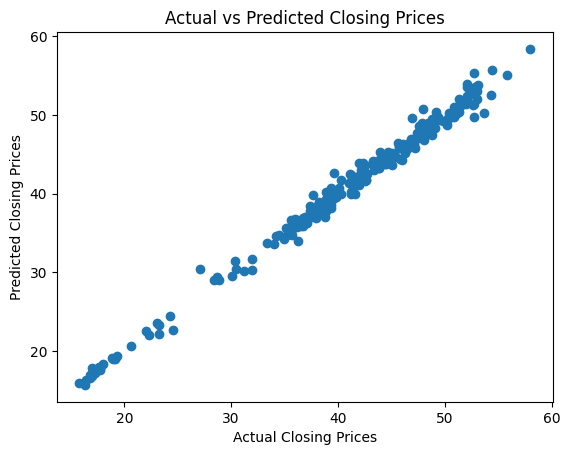

In [ ]:
# モデルの精度を評価するために、実際の終値と予測された終値をプロットして比較
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Actual vs Predicted Closing Prices')
plt.show()

In [ ]:
# prompt: 2017年8月25日の終値だけを取り出す。

prev_day_close_price = [[45]]


In [ ]:
data['close'][data.index == '2017-08-25']

date
2017-08-25    45.25
Name: close, dtype: float64

In [ ]:
next_day_prediction = model.predict(prev_day_close_price)

print(f"Predicted next day closing price: {next_day_prediction[0]}")

Predicted next day closing price: 44.991286079976376


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# 仮に45.25が前日の終値だとします
prev_day_close_price = 45.25

# 予測する前にデータを2次元配列に変換します
prev_day_close_price = np.array(prev_day_close_price).reshape(1, -1)

# 翌日の終値を予測
next_day_prediction = model.predict(prev_day_close_price)

print(f"Predicted next day closing price: {next_day_prediction[0]}")

Predicted next day closing price: 45.240032253075476


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
